# Яндекс.недвижимость. Исследование объявлений о продаже квартир в Ленинградской области

Предоставлены данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться аучиться определять рыночную стоимость объектов недвижимости. Для этого я проведу исследовательский анализ данных и установлю параметры, влияющие на цену квартир. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цели исследования**:
1. Определить рыночную стоимость квартир, исходя из данных сервиса.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить факторы, которые влияют на стоимость квартир.

**Ход исследования:**

Данные о квартирах я получу из файла '/datasets/real_estate_data.csv'. О качестве данных ничего не известно, поэтому перед тем, как приступить канализу, я проведу их предобработку.\
После этого я проверю данные на ошибки и оценю их влияние на результаты исследования. Далее, на этапе обработки, я поищу возможность исправить все ошибки, которые могут привести к искажению результатов.\
Далее я создам новые столбцы, в которых отражу дополнительные факторы, которые очень важны для исследования. После обработки от ошибок и создания новых столбцов я перейду непосредственно к анализу объявлений.

Таким образом, моё исследование пройдёт в семь этапов:

1. Обзор данных
2. Предобработка данных
3. Добавление новых столбцов и расчёты
4. Проведение анализа для Ленинградской области.
5. Проведение анализа для Санкт-Петербурга.
6. Оценка факторов, влияющих на стоимость квартир в наибольшей степени.
7. Общий вывод по результатам анализа.

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except: 
    data = pd.read_csv('real_estate_data.csv', sep='\t')

Первично осматриваю начало таблицы и проверяю общую информацию о данных:

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Взглянем на гистограмму всех "числовых" столбов на одном графике:

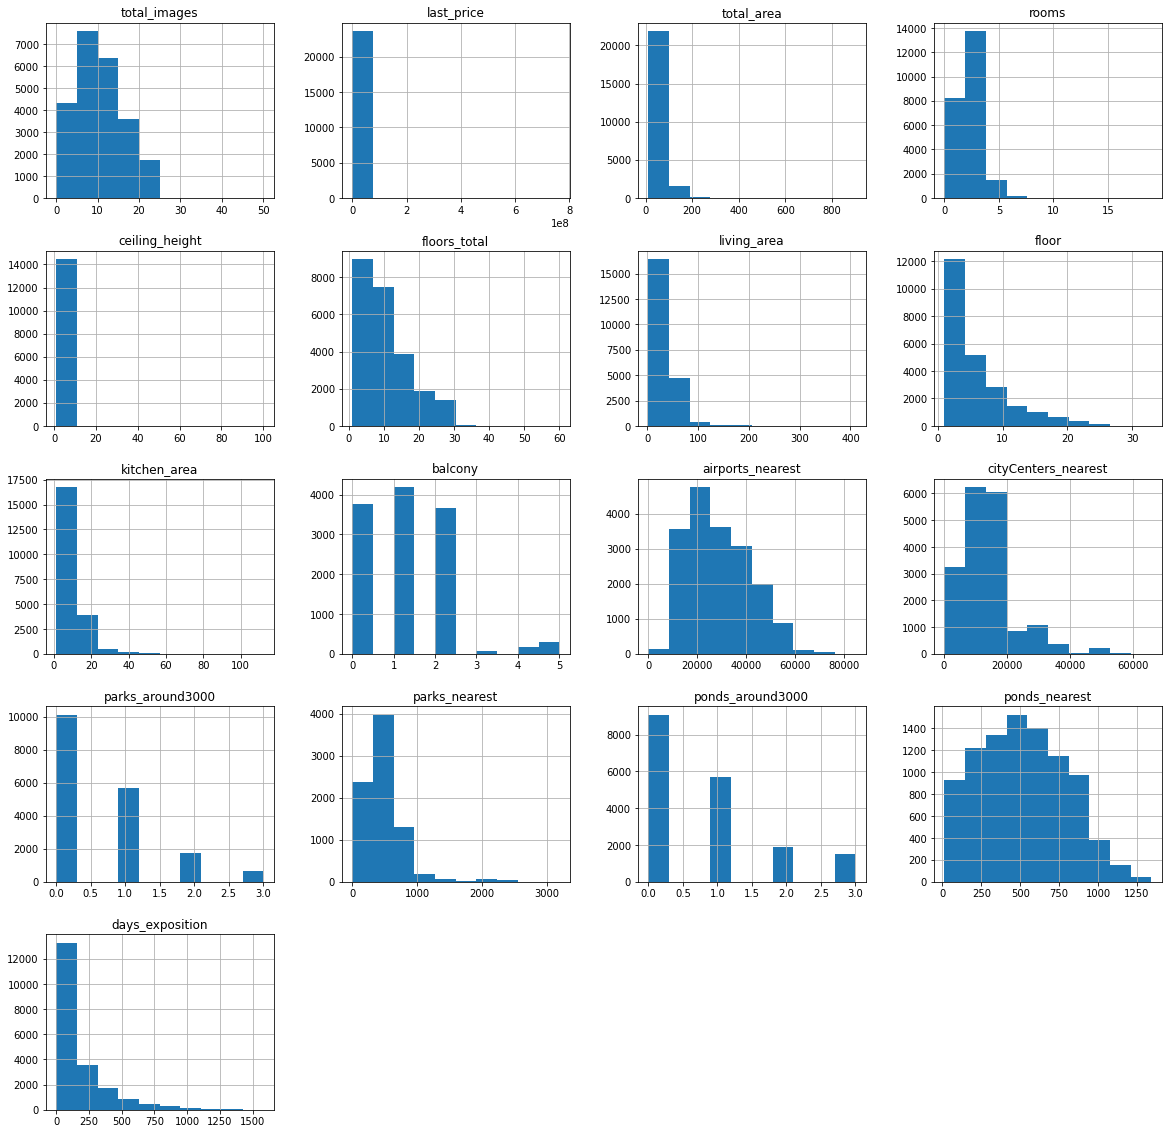

In [5]:
data.hist(figsize=(20, 20));

При первом знакомстве с данными уже заметно, что в таблице много пропущенных значений.\
А из гистограмм видно, что в данных точно присутствуют аномалии.
Я проанализирую их, заполню пропуски там, где это возможно. Если увижу, что так поступить нельзя - удалю из таблицы строки с пропусками, если их количество невелико. При большом количестве пропусков, которые нельзя заполнить логично, оставлю таблицу в том виде, что есть.\
После этого я использую фильтры, чтобы отбросить аномальные значения и уменьшить их влияние на результаты исследования.

### Заполнение пропусков

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Вижу пропущенные значения в колонке `ceiling_height`, или **высота потолков** в квартире.
Заполнить их значения усреднёнными нельзя, поскольку высота потолков может отличаться даже в рамках одного города. Высота потолков может также зависеть от конкретного застройщика или года постройки. Этих данных нет. Высота потолков - важная метрика, и она должна отражать реальную высоту потолков в квартире, поэтому заполнять поопуски средним значением недопустимо.\
Много ли пропусков в этой колонке?

In [7]:
(data['ceiling_height'].isna().sum()/data['ceiling_height'].count() * 100).round(2)

63.4

Пропущено 63.4% данных, поэтому отбрасывать объявления с пропусками нельзя.\
Поэтому оставлю пропуски в изначальном виде, не удаляя и не заполняя их.

Есть пропуски в колонках `kitchen_area` и `living_area`, или **площадь кухни** и **жилая площадь**.\
При этом в колонке `total_area`, или **общая площадь**, пропущенных значений <u>нет</u>.\
Возможно, владельцы студий не указывают площадь кухни, потому что в студиях кухня расположена непосредственно в единственной комнате. В этом случае владелец мог также указать только площадь кухни, не указав жилую площадь. Проверим предположение:

In [8]:
data.query('studio == True and living_area == 0 and kitchen_area != 0')['kitchen_area'].count()

0

Оцениваю процент пропусков в колонке "площадь кухни":

In [9]:
(data['kitchen_area'].isna().sum()/data['kitchen_area'].count() * 100).round(2)

10.63

Пропусков более 10%, поэтому отбросить их нельзя.\
В связи c этим оставлю их в изначальном виде.

In [10]:
(data['living_area'].isna().sum()/data['living_area'].count() * 100).round(2)

8.73

Пропущено почти 9% данных, отбросывать их недопустимо.\
Поскольку жилая площадь состоит именно из площади комнат - заполню пропуски медианным значением для квартир с таким же количеством комнат:

In [11]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms'] == i), 'living_area'].median()

In [12]:
data['living_area'].isna().sum()

0

Готово, пропуски в жилой площади устранены.

Далее есть пропуски в колонках `floors_total` и `locality_name`, или **количество этажей** и **название города**.\
Оцениваю их количество:

In [13]:
(data['floors_total'].isna().sum()/data['living_area'].count() * 100).round(2)

0.36

In [14]:
(data['locality_name'].isna().sum()/data['living_area'].count() * 100).round(2)

0.21

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропусков в количестве этажей - 0.36%, а в названии населенного пункта - 0.21%.\
Процент совсем небольшой, поэтому такие объявления с пропусками можно удалить.

In [16]:
data = data.dropna(subset=['floors_total'])
data = data.dropna(subset=['locality_name'])

Проверяю отсутствие пропусков в этих колонках:

In [17]:
data['floors_total'].isna().sum()

0

In [18]:
data['floors_total'].isna().sum()

0

Готово, строки с пропусками удалены.

В колонке `is_apartment`, указывающей на то, **является ли обьект апартаментами**, также присутствуют пропуски.\
Фактически, апартаменты в первую очередь отличаются тем, что они находятся в статусе <u>нежилой коммерческой недвижимости</u>.\
Если владелец недвижимости сдаёт апартаменты, то он точно об этом знает и отмечает это в анкете. Таким образом, пропущенные значения могут говорить о том, что эти объекты апартаментами не являются - владелец просто не отвечает на вопрос об апартаментах в анкете. <u>Заменим пропуски на **False**</u>.

In [19]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23515
True        50
Name: is_apartment, dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               12090 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Есть пропуски в колонке `balcony`, или **количество балконов**. Вероятно, количество не указали те владельцы, у которых балкона нет. <u>Заменим пропуски на ноль</u>.

In [21]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Также отсутствуют некоторые значения в колонках `airports_nearest` и `cityCenters_nearest`, или **расстояние до аэропорта** и **расстояние до центра города**. Первые могут быть объяснены <u>отсутствием аэропорта поблизости</u> с объектом недвижимости. Вторые же пропуски могут быть обусловлены работой системы.
Оцениваю долю таких пропусков:

In [22]:
(data['airports_nearest'].isna().sum()/data['living_area'].count() * 100).round(2)

23.44

In [23]:
(data['cityCenters_nearest'].isna().sum()/data['living_area'].count() * 100).round(2)

23.34

Вижу, что пропусков в обоих колонках очень много - больше 23%. Такие значения нельзя удалить, ровно как нельзя и заполнить средними значениями, поэтому я оставлю их в изначальном виде.

Есть пропущенные значения в колонках `parks_around3000` и `ponds_around3000`, или **количество парков и водоёмов** в **3 км** от объекта. Вероятно, это связано с отсутствием парков и водоёмов рядом с объектом.

Оценю долю пропусков:

In [24]:
(data['parks_around3000'].isna().sum()/data['living_area'].count() * 100).round(2)

23.34

In [25]:
(data['ponds_around3000'].isna().sum()/data['living_area'].count() * 100).round(2)

23.34

Доля пропусков снова больше 23%, заменить их усредненными значениями нельзя.\
Судя по всему, информация о расстоянии до аэропорта и центра города, о количестве парков и водоёмов поблизости отсутствует у одних и тех же объявлеиий.\
Заменяю пропуски на 0 - здесь это уместно.

In [26]:
data[['parks_around3000', 'ponds_around3000']] = data[['parks_around3000', 'ponds_around3000']].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

По такому же принципу смотрю на долю пропусков в колонках `ponds_nearest` и `parks_nearest`, или **расстояние до ближайшего водоёма** и **расстояние до ближайшего парка**.

In [27]:
(data['ponds_nearest'].isna().sum()/data['living_area'].count() * 100).round(2)

61.65

In [28]:
(data['parks_nearest'].isna().sum()/data['living_area'].count() * 100).round(2)

65.92

Процент пропусков очень высок - более 60%. Это может быть связано с тем, что поблизости с многими квартирами нет парков и водоёмов.\
Заполнить нулями недопустимо, поскольку это исказит результаты анализа. Оставляю, как есть.

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

В колонке `days_exposition` есть пропуски. Это **количество дней, которое прошло с момента публикации** до снятия.\
Рассчитать эти пропуски, исходя из даты публикации, невозможно, поскольку неизвестна дата снятия объявления с публикации.
Использовать медианные значения нельзя, поскольку они могут неверно отражать реальную картину. Поэтому <u>пропуски оставлены в изначальном виде</u>.\
Также можно предположить, что эти объекты ещё не сняты с публикации на момент выгрузки данных.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23565 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Готово - рассмотрены все пропуски, некоторые из них заполнены медианным значением, некоторые - заполнены нулём, а большая часть - оставлены в изначальном виде.\
Теперь я приведу формат данных к удобному для анализа.

### Изменение формата значений данных

Привожу формат даты и времени в колонке `first_day_exposition`, или **дата размещения объявления**, к стандартному.

In [31]:
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

Формат колонок с **количеством балконов**, **парков и водоёмов поблизости**, **общим количеством этажей** и **дней, прошедших с момента публикации до снятия**, меняю на целочисленный.

In [32]:
list = ['balcony', 'parks_around3000', 'ponds_around3000', 'floors_total', 'days_exposition']
for n in list:
    data[n] = pd.to_numeric(data[n], downcast='integer', errors='coerce')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int8          
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

Все форматы приведены в порядок.

### Устранение дубликатов

Необходимо устранить дубликаты в колонке `locality_name`, или **название населённого пункта**.

In [34]:
data['locality_name'].duplicated().count()

23565

In [35]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].value_counts()

санкт-петербург        15651
посёлок мурино           520
посёлок шушары           439
всеволожск               398
пушкин                   369
                       ...  
село никольское            1
деревня терпилицы          1
поселок рабитицы           1
деревня хапо-ое            1
деревня чудской бор        1
Name: locality_name, Length: 364, dtype: int64

In [36]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .str.replace('поселок городского типа', 'поселок')
    .str.replace('городской поселок', 'поселок')
    ) 
data['locality_name'].value_counts()

санкт-петербург       15651
поселок мурино          552
поселок шушары          439
всеволожск              398
пушкин                  369
                      ...  
деревня шпаньково         1
деревня мануйлово         1
поселок жилпоселок        1
село шум                  1
поселок ропша             1
Name: locality_name, Length: 322, dtype: int64

**Заглавные** буквы <u>заменены **строчными**</u>, буква **ё** <u>заменена буквой **е**</u>, а строки `поселок городского типа` и `городской поселок` заменены на **"поселок"**, т.к. фактически <u>это одно и то же</u>.

### Добавление новых колонок для анализа

##### **средняя стоимость** одного м² квартиры, или `meter_count`

In [37]:
def make_meter_count(row):
    meter = row['last_price']/row['total_area']
    return meter
data['meter_count'] = data.apply(make_meter_count, axis=1).round(2)

Значения в колонке `last_price`, или **цена квартиры**, поделены на **1 000 000**, чтобы видеть статистику в млн. рублей.

In [38]:
data['last_price'] = data['last_price']/1000000

##### **день недели**, **месяц** и **год** публикации объявления, или `week_day`, `month`и `year` 

In [39]:
def week_day(row):
    day = row['first_day_exposition'].weekday()
    return day
data['week_day'] = data.apply(week_day, axis=1)

def months(row):
    month = row['first_day_exposition'].month
    return month
data['month'] = data.apply(months, axis=1)

def years(row):
    year = row['first_day_exposition'].year
    return year
data['year'] = data.apply(years, axis=1)

##### **тип этажа** квартиры (*первый, последний, другой*), или`floor_type`

In [40]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

убеждаюсь в том, что все три типа заполнены:

In [41]:
data[['floor', 'floors_total', 'floor_type']]['floor_type'].unique()

array(['другой', 'первый', 'последний'], dtype=object)

##### **Расстояние до центра** населенного пункта в километрах, или `city_centers`

In [42]:
data['city_centers'] = (data['cityCenters_nearest']/1000).round(0)

Все нужные колонки добавлены.

Теперь проверяю всю таблицу на явные дубликаты:

In [43]:
data.duplicated().sum()

0

Дубликатов нет, значит можно переходить к анализу.\
Но сначала стоит сделать несколько выводов.

После предобработки данных выяснилось, что в исходном датасете есть много пропущенных значений.\
При этом пропущены и значения, которые собстенник указывает вручную, и значения, которые заполняются автоматически на основе карт.
Больше всего сомнений вызывают объявления, в которых вообще не указано ни расстояние до аэропорта, ни расстояние до центра города.\
Если аэропорта поблизости нет, то центр города - точно должен быть.
Ещё раз посчитаю процент таких объявлений:

In [44]:
(data.loc[(data['airports_nearest'].isna()) & (data['cityCenters_nearest'].isna())]['total_area'].count()/data['total_area'].count() * 100).round(2)

23.34

Процент объявлений с полупустой информацией превышает 23%, а это почти четверть от всех данных.
Пропуски в данных, которые вводит сам автор объявления, можно объяснить человеческим фактором. Чаще всего люди не указывают высоту потолков и не расписывают детально площадь комнат, а также не ставят чекбокс "является апартаментами, или нет".\
Пропуски, которые заполняются автоматически по картам, явно имеют техническую причину. Подробнее эту тему раскрываю в финальном выводе и *рекомендациях*.

## Первичный анализ данных. Гистограммы, диаграммы размаха и выпадающие значения

### Общая площадь, или `total_area`

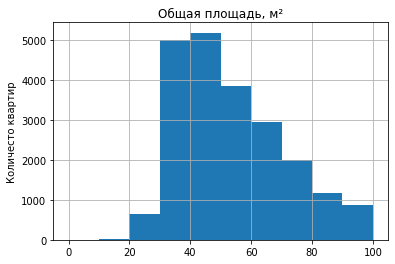

In [45]:
plt.title('Общая площадь, м²');
plt.ylabel('Количесто квартир');
data['total_area'].hist(range=(0, 100));

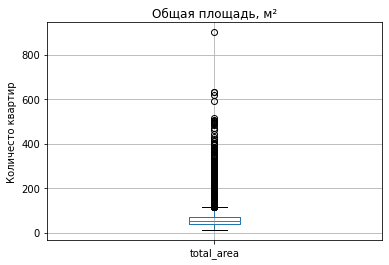

In [46]:
plt.title('Общая площадь, м²');
plt.ylabel('Количесто квартир');
data.boxplot('total_area');

По <u>диаграмме размаха</u> видно, что значения выше **100** м² больше стандартного отклонения, при этом встречаются значения и гораздо большие.\
Однако обозначить их выбросами **нельзя**, ведь встречаются и квартиры с такой большой площадью, например, в статье\
https://asninfo.ru/comfortlive/210-samyye-bolshiye-kvartiry-sankt-peterburga \
Это же утверждение справедливо и для жилой площади, и для площади кухни.

Хорошо видно, что большинство квартир (более 5000) имеют площадь от 40 до 50 м².
Для анализа можно взять значения <u>в диапозоне до 200 кв. м²</u>. Это позволит не учитывать слишком выбивающиеся значения и увидеть общую тенденцию.

Тут же считаю, сколько составили потери после фильтра:

In [47]:
filtered_total_area = data.query('total_area < 200')
(len(filtered_total_area) / len(data) * 100)

99.02397623594314

Потери составили **0,98%**, что является допустимым.

### Жилая площадь, или `living_area`

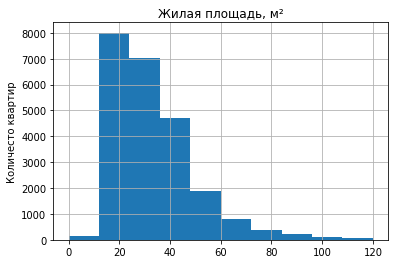

In [48]:
plt.title('Жилая площадь, м²');
plt.ylabel('Количесто квартир');
data['living_area'].hist(range=(0, 120));

Хорошо видно, что у большинства квартир (около 8000) жилая площадь составляет от 12 до 22 м².

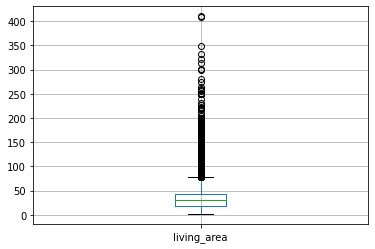

In [49]:
data.boxplot('living_area');

Аналогичным образом получаю срез по квартирам с жилой площадью **до 120 м²**, и проверяем процент потерь данных:

In [50]:
filtered_living_area = data.query('living_area <= 120')
len(filtered_living_area) / len(data) * 100

99.02821981752598

Потери составили **0,97%**, что допустимо.

### Площадь кухни, или `kitchen_area`

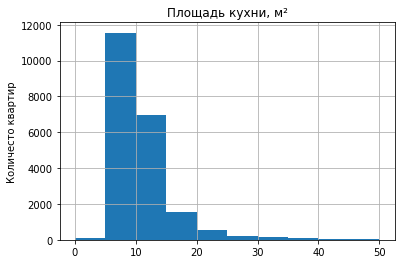

In [51]:
plt.title('Площадь кухни, м²');
plt.ylabel('Количесто квартир');
data['kitchen_area'].hist(range=(0, 50));

Заметно, что больше всего квартир (около 12000) имеют кухню площадью от 5 до 10 м².

<AxesSubplot:title={'center':'Площадь кухни, м²'}, ylabel='Количесто квартир'>

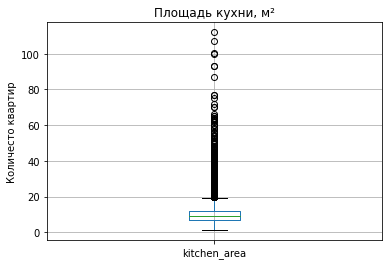

In [52]:
plt.title('Площадь кухни, м²')
plt.ylabel('Количесто квартир')
data.boxplot('kitchen_area')

Срезаю данные по кухням менее 40 м², и проверяю процент потерь:

In [53]:
filtered_kitchen_area = data.query('kitchen_area < 40')
len(filtered_kitchen_area) / len(data) * 100

89.91725015913431

Потери составили **0,72%** - это допустимо.


### Цена квартиры, или `last_price`

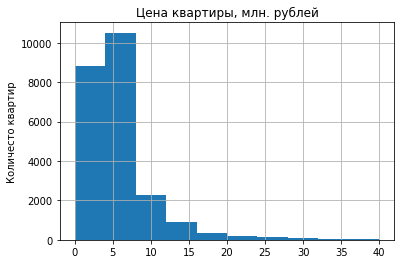

In [54]:
plt.title('Цена квартиры, млн. рублей');
plt.ylabel('Количесто квартир');
data['last_price'].hist(range=(0, 40));

Хорошо видно, что большинство квартир (более 10000) стоят от 4 до 8 млн. рублей.
Диаграмма размаха по цене квартиры не строится, поскольку сложно оценить, является ли цена выбросом - пользователь может указать любую цену. Это справедливо, в частности, для максимальных значений.\
Для анализа используем квартиры со стоимостью **менее 40 млн.** рублей.
Срез по ценам ниже **40 млн.** рублей и подсчет процента потерь:

In [55]:
filtered_price = data.query('last_price < 40')
print((filtered_price['last_price'].count() / data['last_price'].count() * 100).round(2))

99.18


Потери составили **0,82%** - допустимое количество.

### Количество комнат, или `rooms`

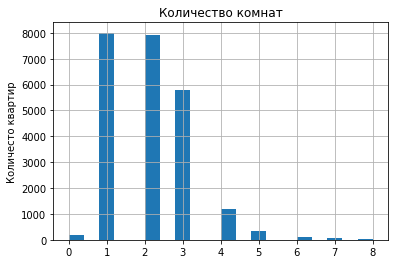

In [56]:
plt.title('Количество комнат');
plt.ylabel('Количесто квартир');
data['rooms'].hist(bins=20, range=(0, 8));

Заметно, что у большинства квартир (примерно 16000) есть одна либо две комнаты.

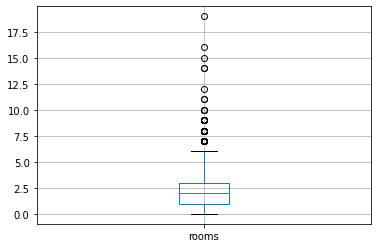

In [57]:
data.boxplot('rooms');

Оценить, являются ли выбросами большие значения количества комнат, сложно, ведь действительно бывает много комнат в квартире, однако вызывает сомнения, что все значения из колонки соответствуют действительности.
Исходя из гистограммы, получим срез по количеству комнат **8 и меньше**, и процент потерь:

In [58]:
filtered_rooms = data.query('0 < rooms <=8')
print((filtered_rooms['rooms'].count() / data['rooms'].count() * 100).round(2))

99.1


Процент потерь составляет **0,9%** и близится к **1%**, что не очень хорошо - однако сложно судить, насколько выбивающиеся значения соответствуют действительности, поэтому <u>оставляю это значение, как есть<u/>.

### Высота потолков, или `ceiling_height`

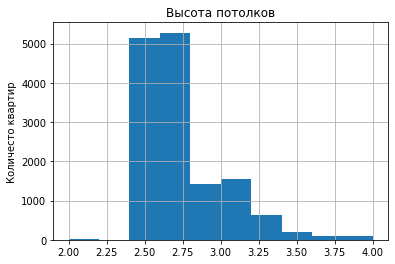

In [59]:
plt.title('Высота потолков');
plt.ylabel('Количесто квартир');
data['ceiling_height'].hist(range=(2, 4));

На гистограмме отчетливо видно, что у большинства квартир (около 10000) потолки высотой от 2.4 до 2.8 метров.\
Проверяю на выбросы:

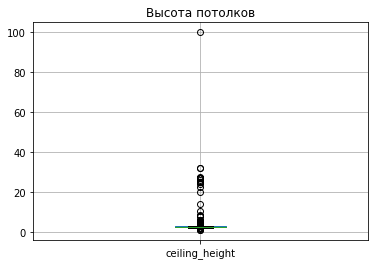

In [60]:
plt.title('Высота потолков');
data.boxplot('ceiling_height');

Заметно аномальное значение в **100** м., его можно исключить из выборки.

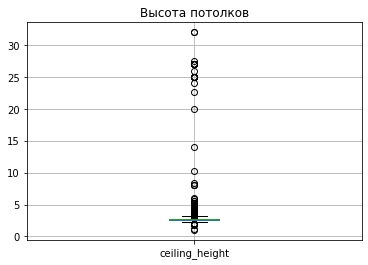

In [61]:
plt.title('Высота потолков');
data = data.query('ceiling_height != 100');
data.boxplot('ceiling_height');

In [62]:
data.query('ceiling_height > 10')['ceiling_height'].unique()

array([25. , 32. , 27. , 24. , 26. , 14. , 20. , 22.6, 27.5, 10.3])

Стало заметно, что есть большое количество значений, которые точно не отражают реальную высоту потолка.\
Опираясь на статью https://elitnoe.ru/articles/991-top-5-elitnyh-kvartir-s-vysotoy-potolkov-ot-5-do-10-metrov можно сделать вывод, что <u>высота потолков свыше 10.3 метров явлется аномальной</u>.\
Заметно, что после высоты в **10.3** метра идёт только одно значение в **14** метров, а далее - начинаются с **20** метров. Возможно, те люди, которые указали **20 и выше** метров, не использовали точку для разделения метров и сантиметров. Это также видно из формата записи высоты, например `"25. "`. Точка явно не на своём месте. Значение в **14** метров стоит <u>отбросить</u>, как выброс, а значения в **20** и выше метров - <u>поделить на **10**</u>, чтобы получить реальные значения высоты потолков.

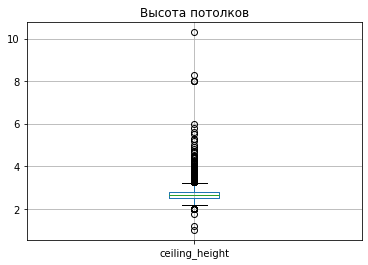

In [63]:
plt.title('Высота потолков')

data = data.query('ceiling_height !=14')
def res(ceiling):
    if ceiling > 19:
        return ceiling/10
    else:
        return ceiling
data['ceiling_height'] = data['ceiling_height'].apply(res)
data.boxplot(['ceiling_height']);

Теперь со значениями всё в порядке.

Исходя из графиков, для анализа закономерностей <u>подойдут квартиры с потолками до 4 метров</u>.\
Получаю срез и смотрю процент потерь:

In [64]:
filtered_ceiling = data.query('ceiling_height <= 4')
print((filtered_ceiling['ceiling_height'].count() / data['ceiling_height'].count() * 100).round(2))

99.65


Процент потерь составил всего **0.35%**, что вполне допустимо.

### Тип этажа, или `floor_type`

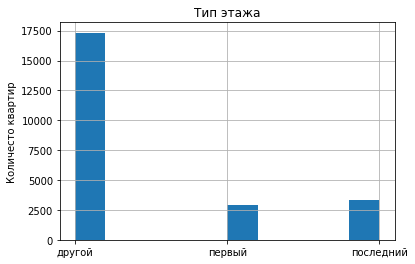

In [65]:
plt.title('Тип этажа');
plt.ylabel('Количесто квартир');
data['floor_type'].hist();

C этими данными всё в порядке - логично, что большинство квартир находится на этажах между первым и последним.

#### Общее количество этажей в доме, или `floors`

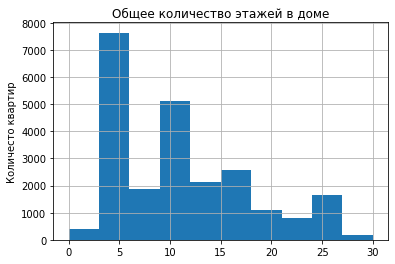

In [66]:
plt.title('Общее количество этажей в доме');
plt.ylabel('Количесто квартир');
data['floors_total'].hist(range=(0, 30));

Вижу, что больше всего квартир в выборке (почти 8000) расположены в пятиэтажках, затем идут 10-этажные дома (более 5000).\
Проверяю на выбросы:

2253     60
16731    52
16934    37
11079    36
397      36
5807     36
5808     35
5749     35
8496     35
4855     35
Name: floors_total, dtype: int8


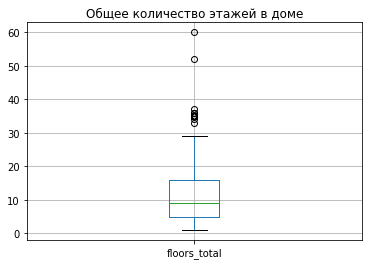

In [67]:
plt.title('Общее количество этажей в доме')
data.boxplot('floors_total');
print(data['floors_total'].sort_values(ascending=False).head(10))

Странно, что есть дома выше, чем в **29** этажей, учитывая, что самый большой дом в Ленобласти составляет **29** этажей в высоту, как отражено в статье https://lenobldoma.ru/.

Высота дома в **52** этажа явно <u>является аномалией</u>, сразу удаляю её.

In [68]:
data = data.query('floors_total != 52')

При этом дома с высотой от **30** до **40** этажей, возможно, отражают действительность (указанный сайт может не включать какие-либо дома), тем не менее, они <u>считаются выбросами</u> относительно других значений.\
Сделаем срез по высоте дома менее **30** этажей, и оценим процент потерь:

In [69]:
filtered_floors = data.query('floors_total < 30')
(filtered_floors['floors_total'].count() / data['floors_total'].count() * 100).round(2)

99.87

Потери составили **0.13%**, что приемлимо для исследования.

### Расстояние до центра города в метрах, или `cityCenters_nearest`

<AxesSubplot:title={'center':'Расстояние до центра города, м.'}, ylabel='Количесто квартир'>

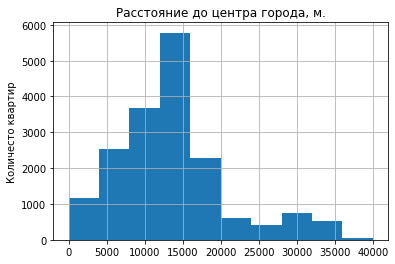

In [70]:
plt.title('Расстояние до центра города, м.');
plt.ylabel('Количесто квартир');
data['cityCenters_nearest'].hist(range=(0, 40000))

По гистограмме видно, что большая часть квартир (почти 6000) находятся на расстоянии 12-16 км. от центра.

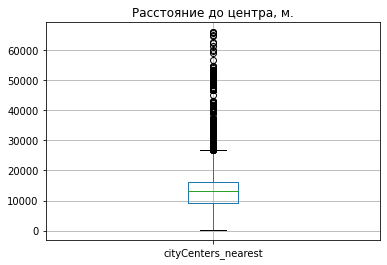

In [71]:
plt.title('Расстояние до центра, м.');
data.boxplot('cityCenters_nearest');

Нет возможности определить какое-либо значение как аномальное, поскольку расстояние до центра города может быть очень разным.\
Учтём, что в данных информация по Ленинградской области. В самом большом город области, Санкт-Петербуре, согласно данным Яндекс.Карт, максимально удаленная от центра города точка находится в **35 км** от центра.\
Это означает, что строки, превышающие **35 км**, могут являться <u>выбросами</u>, вызванными работой системы. Это также подтверждается диаграммой размаха.\
*(О причинах подробнее в блоке "Рекомендации").*

Сделаем срез по ячейкам, где указано расстояние до центра города 35000 м. или ниже, и проверим процент потерь:

In [72]:
filtered_citycenter = data.query('cityCenters_nearest <= 40000')
(filtered_citycenter['cityCenters_nearest'].count()/data['cityCenters_nearest'].count() * 100).round(2)

98.34

Процент потерь составляет **1,7%**, что является большим значением.\
Расстояние до центра города в Ленинградской области *(по данным Яндекс.карт)* фактически не может превышать **35 км**, а это значит, что по каким-то квартирам может быть <u>неверно определён город размещения</u>. Это также значит, что аномалии, вероятно, принадлежат квартирам в Санкт-Петербурге.\
Например, размещено объявление о продаже квартиры в пригороде, но отмечен город Санкт-Петербург, и из-за этого расстояние до центра города больше, чем возможно.\
Тем не менее, расширять границы фильтра не стану - именно выбросы могут исказить реальную картину.\
Поэтому оставляю фильтр на текущем уровне.

### Расстояние до ближ. парка, или `parks_nearest`

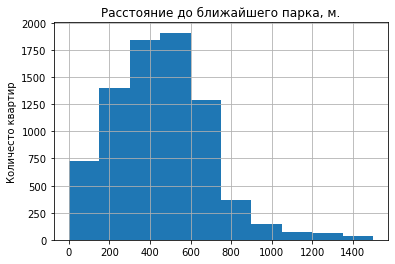

In [73]:
plt.title('Расстояние до ближайшего парка, м.');
plt.ylabel('Количесто квартир');
data['parks_nearest'].hist(range=(0, 1500));

Вижу, что большинство квартир (более 3000) находятся на расстоянии от 300 до 600 метров до ближайшего парка.

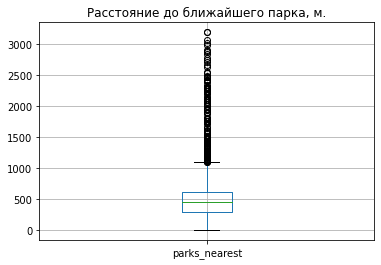

In [74]:
plt.title('Расстояние до ближайшего парка, м.');
data.boxplot('parks_nearest');

Исходя из гистограммы и диаграммы размаха, срезаем объявления с расстоянием до ближайшего парка **менее 1500 м**. и смотрим процент потерь:

In [75]:
filtered_parks = data.query('parks_nearest <= 1500')
(filtered_parks['parks_nearest'].count()/data['parks_nearest'].count() * 100).round(2)

97.86

Потери составили **2,14%**, это довольно высокое значение, однако увеличивать границы фильтра не стоит - выбросы могут сильно повлиять на результаты.

### Процент потерь после всех фильтров

После всех фильтров потери в данных составили **4%**, это очень хорошее число - реальная картина практически не исказилась.

In [76]:
data_filtered = data.query('total_area < 200') \
.query('kitchen_area <= 40 or kitchen_area.isna()') \
.query('last_price < 40') \
.query('rooms <= 8') \
.query('ceiling_height <= 4 or ceiling_height.isna()') \
.query('floors_total < 30') \
.query('cityCenters_nearest <= 40000 or cityCenters_nearest.isna()') \
.query('parks_nearest <= 1500 or parks_nearest.isna()')

len(data_filtered)/len(data)*100

96.05721076309311

## Как быстро продаются квартиры?

Взглянем на гистрограмму, диаграмму размаха и средние/медианные значения:

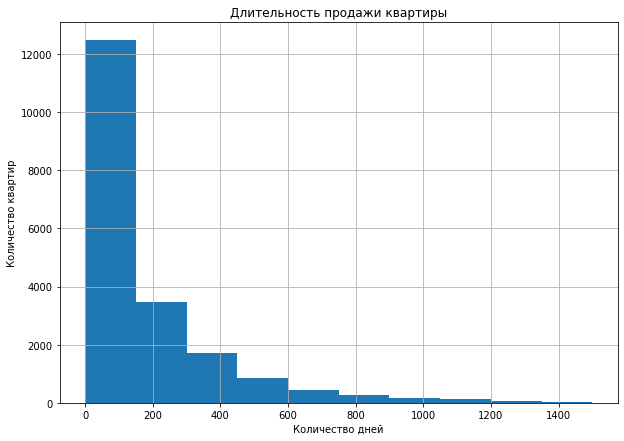

In [77]:
data_filtered['days_exposition'].hist(bins=10, range=(0, 1500), figsize=(10,7));
plt.title('Длительность продажи квартиры');
plt.xlabel('Количество дней');
plt.ylabel('Количество квартир');

count    19637.000000
mean       177.714417
std        216.143197
min          1.000000
25%         44.000000
50%         94.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64


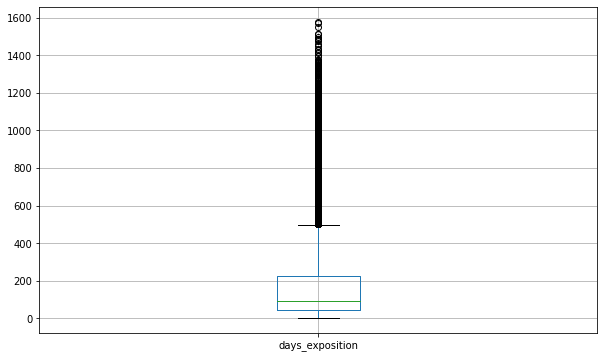

In [78]:
data_filtered.boxplot('days_exposition', figsize=(10,6));
print(data_filtered['days_exposition'].describe())

Из диаграммы размаха видно, что <u>большинство объявлений</u> в среднем находят покупателя в срок от **22 до 199 дней**.\
При этом <u>в среднем</u> объявление проводит на площадке **155 дней**.\
Граница размаха заканчивается на отметке около **450 дней**, что определяет <u>необычно высокие</u> значения.\
Таким образом, можно считать продажи по объявлениям, <u>которые нашли покупателей менее, чем за **22** дня, **быстрыми**</u>, а продажи квартир, <u>длящиеся более **450 дней** - необычно долгими</u>.

## Факторы, которые больше всего влияют на полную стоимость объекта

### Общая корреляция

Расссмотрим зависимость стоимости квартиры от:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количества комнат;
 - этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год).

In [79]:
data_price = data_filtered[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'week_day', 'month', 'year', 'days_exposition', 'meter_count']]
data_price.corr().head(1)

,last_price,total_area,living_area,kitchen_area,rooms,week_day,month,year,days_exposition,meter_count
last_price,1.0,0.772077,0.644611,0.572595,0.486173,-0.012012,0.006979,-0.030964,0.122202,0.70096


Из матрицы корреляции заметно, цена квартиры взаимосвязана с **площадью квартиры** в <u>значительной степени</u>.\
Также цена связана с **жилой площадью**, **площадью кухни** и **количеством комнат** в <u>менее значительной степени</u>, для этих величин она *(корреляция)* примерно одинакова.\
Оценивать корреляцию цены квартиры с **годом**, **месяцем** и **днём** публикации по этой таблице <u>некорректно</u> - нужно рассматривать конкретные месяцы и года. 

Зависимость цены от **общей площади** очевидна - ведь при продаже недвижимости цена зависит от <u>каждого м²</u> общей площади.
Также очевидна косвенная зависимость цены от **площади кухни** и **жилой площади**, ведь эти метрики входят в обшую площадь квартиры. При этом корреляция с жилой площадью <u>больше</u>, чем с площадью кухни - это означает, что люди при продаже квартиры больше опираются на жилую площадь, чем на площадь кухни.

### Зависимость цены от общей площади

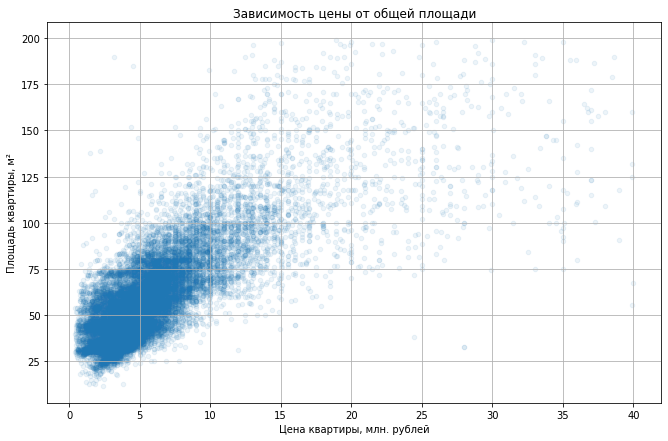

In [80]:
data_filtered.sort_values('last_price').plot(x='last_price', y='total_area', kind='scatter', alpha=0.08, grid=True, figsize=(11,7));
plt.title('Зависимость цены от общей площади');
plt.xlabel('Цена квартиры, млн. рублей');
plt.ylabel('Площадь квартиры, м²');

**Вывод:** цена зависит от общей площади квартиры.\
Прямая зависимость цены от общей площади прослеживается для квартир, общая площадь которых **меньше 100 метров**, а цена не превышает **10 млн**. После этого зависимость заметна <u>гораздо слабее</u>.\
Можно предположить, что при площади квартиры **более 100 метров** стоимость начинает больше зависеть от других факторов, которые менее важны покупателям, которые выбирают квартиры меньше 100 метров. Например, от количество комнат, этажа или количества парков поблизости.

Привожу графики для жилой плошади и площади кухни в отдельности:

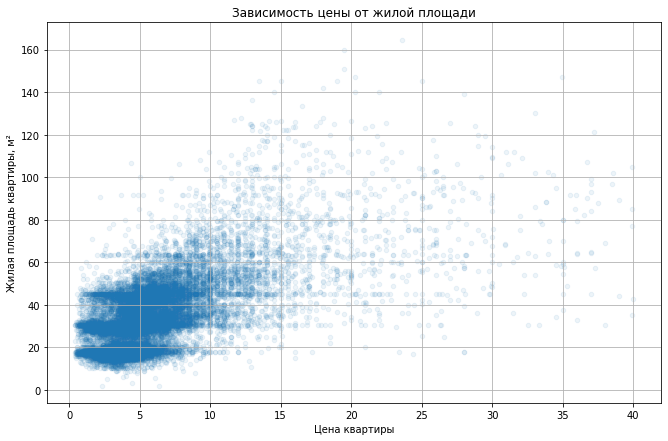

In [81]:
data_filtered.sort_values('last_price').plot(x='last_price', y='living_area', kind='scatter', alpha=0.08, grid=True, figsize=(11,7));
plt.title('Зависимость цены от жилой площади');
plt.xlabel('Цена квартиры');
plt.ylabel('Жилая площадь квартиры, м²');

Хорошо видно, что цена квартиры зависит от жилой площади. При этом зависимость видна для квартир с жилой площадью до 50 м² и стоимостью менее 9 млн. рублей.

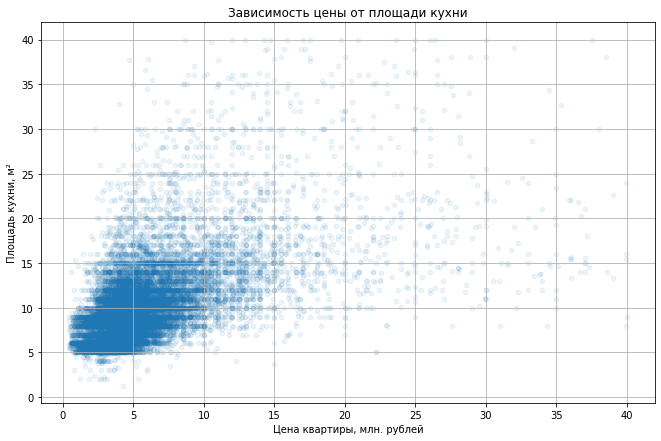

In [82]:
data_filtered.sort_values('last_price').plot(
    x='last_price', y='kitchen_area', kind='scatter', alpha=0.08, grid=True, figsize=(11,7));

plt.title('Зависимость цены от площади кухни');
plt.xlabel('Цена квартиры, млн. рублей');
plt.ylabel('Площадь кухни, м²');

Предположение подтвердилось - цена квартиры точно так же растет соразмерно площади кухни и жилой площади.\
При этом жилая площадь особенно влияет на цену квартир с ценником до **9 млн. рублей**, после этого зависимость ослабляется.\
Площадь кухни значительно влияет на цену квартир с ценником до **6 млн. рублей**.\
На графиках также отчетливо видно, что жилая площадь влияет на цену  сильнее площади кухни, это подтверждает рассчитанную в начале корреляцию.

### Зависимость цены от количества комнат

In [83]:
agg = {'last_price':['count','mean'], 'total_area':'mean'}
data_rooms = data_filtered.groupby('rooms').agg(agg).round(2).reset_index()
data_rooms.columns = ['количество комнат','количество квартир', 'средняя цена, млн', 'средняя площадь']
data_rooms

,количество комнат,количество квартир,"средняя цена, млн",средняя площадь
0,0,190,2.96,27.35
1,1,7825,3.81,37.55
2,2,7661,5.43,55.47
3,3,5559,7.49,76.30
4,4,1072,10.54,100.10
5,5,246,13.50,133.18
6,6,58,15.10,152.05
7,7,20,18.68,158.50
8,8,2,19.15,170.60


Для чистоты вывода исключим из выборки квартиры в **6 комнат и более**, поскольку записей о таких квартирах несравнимо меньше, чем остальных записей.
Построим график изменения медианной цены:

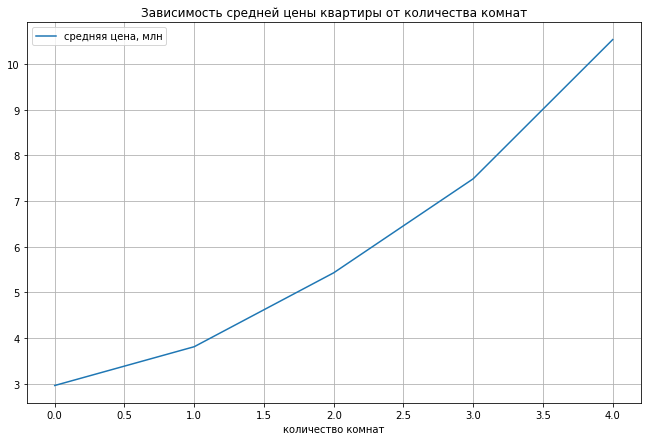

In [84]:
data_rooms.head(5).plot(x='количество комнат', y='средняя цена, млн',
                        grid=True, figsize=(11,7));
plt.title('Зависимость средней цены квартиры от количества комнат');

**Вывод:** Средняя стоимость квартиры зависит от количества комнат.\
Зависимость обусловнена, в том числе, тем, что большее количество комнат в квартире ведёт к большей общей площади, от которой цена зависит напрямую.\
При этом стоимость растёт геометрически в данной выборке:\
Рост цены при увеличении количества комнат с **3 до 4** комнат больше, чем рост цены от **1 до 3** комнат.

### Зависимость цены от типа этажа



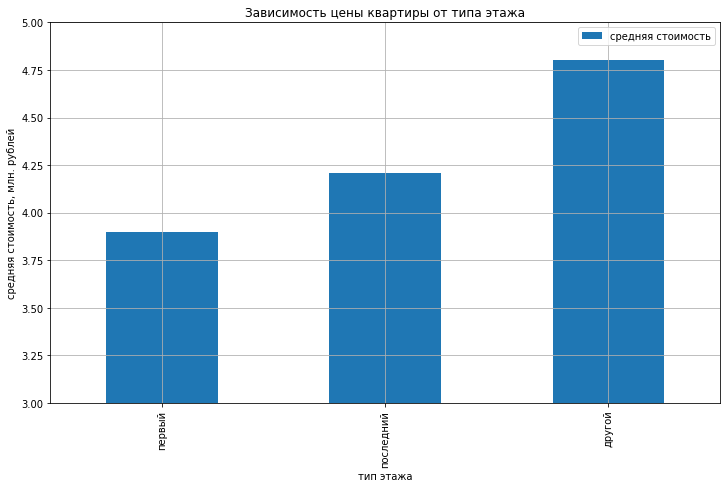

In [85]:
data_floor_type = data_filtered \
.pivot_table(index='floor_type', values='last_price', aggfunc={'mean','median'}).reset_index()
data_floor_type.columns = ['тип этажа', 'количество квартир', 'средняя стоимость']
data_floor_type.sort_values('средняя стоимость').plot(
    x='тип этажа', y='средняя стоимость', kind='bar', figsize=(12,7), ylim=(3, 5), grid=True);
plt.ylabel('средняя стоимость, млн. рублей');
plt.title('Зависимость цены квартиры от типа этажа');

Заметно, что квартиры на первом этаже обычно дешевле, чем на последнем, при этом дороже всего - квартиры на остальных этажах.\
Однако стоит учесть, что в домах на **5 и менее** этажей, как правило, <u>отсутствует лифт</u>. В таком случае нужно постоянно подниматься на последний этаж пешком.\
В домах на **6 и более этажей** <u>лифт присутствует</u>, при этом в высоких домах люди могут отдавать предпочтения последнему этажу ради вида из окна.\
Проверим это предположение на 2 выборках, по каждой - в отдельности.


#### Дома в 5 этажей и ниже (лифта нет)

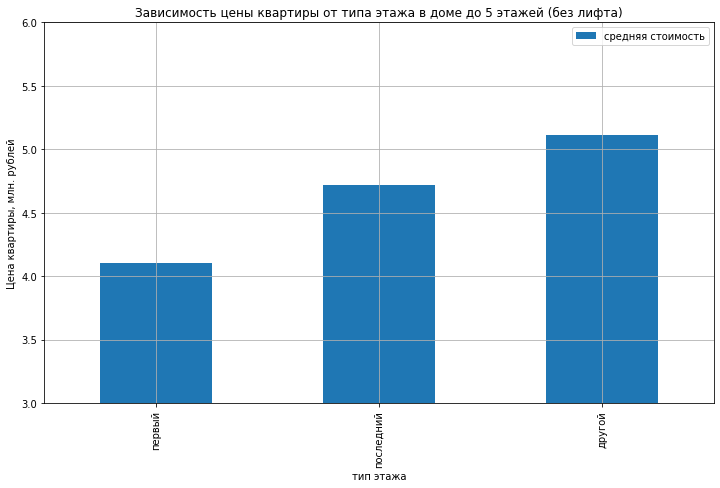

In [86]:
data_low = data_filtered.query('floors_total <= 5') \
.pivot_table(index='floor_type', values='last_price', aggfunc={'mean', 'count'}).reset_index()
data_low.columns = ['тип этажа', 'количество квартир', 'средняя стоимость']
data_low.sort_values('средняя стоимость').plot(
x='тип этажа', y='средняя стоимость', kind='bar', figsize=(12,7), ylim=(3, 6), grid=True);
plt.title('Зависимость цены квартиры от типа этажа в доме до 5 этажей (без лифта)');
plt.ylabel('Цена квартиры, млн. рублей');

Заметно, что при 5 этажах и ниже **дешевле всего** квартиры, расположенные на <u>первом этаже</u>. Затем следует **последний** и **другие** этажи.\
У самой низкой цены на квартиры на первом этаже в пятиэтажках может быть причина - например, люди меньше ценят, когда окна в квартире выходят прямо на улицу.\
При этом стоимость квартиры на любом другом этаже заметно выше, чем на последнем. Более низкая стоимость квартир на последнем этаже может быть обусловлена отсутствием лифта.

#### Дома выше 5 этажей (есть лифт)

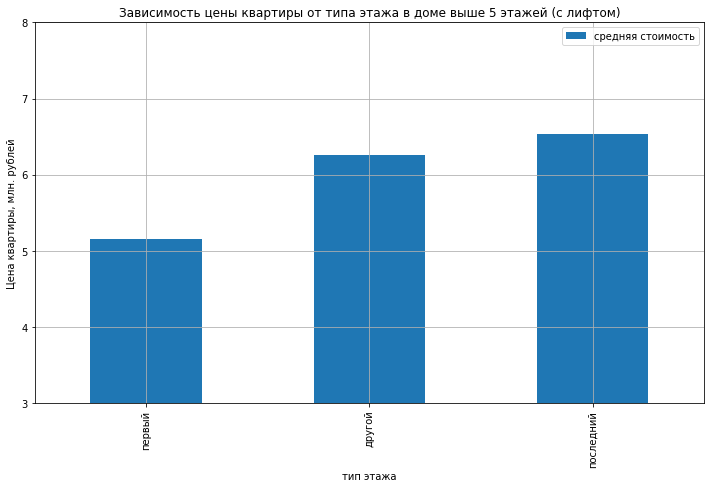

In [87]:
data_high = data_filtered.query('floors_total > 5') \
.pivot_table(index='floor_type', values='last_price', aggfunc={'mean', 'count'}).reset_index()
data_high.columns = ['тип этажа', 'количество квартир', 'средняя стоимость']

data_high.sort_values('средняя стоимость').plot(
     x='тип этажа', y='средняя стоимость', kind='bar', figsize=(12,7), ylim=(3, 8), grid=True
);
plt.title('Зависимость цены квартиры от типа этажа в доме выше 5 этажей (с лифтом)');
plt.ylabel('Цена квартиры, млн. рублей');

Картина для домов **выше 5 этажей**, а значит - имеющих лифт, иная.\
Как и в случае с домами до 5 этажей, <u>дешевле всего</u> квартиры, расположенные на **первом** этаже.\
Однако теперь <u>самые дорогие</u> квартиры - именно на последнем этаже, а квартиры на остальных этажах (кроме первого) - заметно <u>дешевле</u>.\
Предположение подтвердилось, в <u>высоких домах больше всего ценится квартира на последнем этаже</u>.\
Это может быть обусловлено тем, что оттуда открывается лучший вид на город, а в доме есть лифт.

**Вывод:** <u>Стоимость квартиры зависит от этажа.</u>\
Меньше всего стоят квартиры на первом этаже.\
При этом:\
В домах без лифта (5 этажей и меньше) последний этаж ценится меньше, чем остальные этажи (кроме первого)\
В домах с лифтом (больше 5 этажей) последний этаж ценится больше, чем все остальные.\
Квартиры в домах больше 5 этажей в среднем выше, чем квартиры в пятиэтажках (и домах ниже)

### Зависимость цены от года размещения
Свожу таблицу по году публикации объявления, считаю медианную стоимость и количество объявлений.\
Дополнительно вывожу таблицу, чтобы убрать года с наименьшим количеством объявлений.

In [88]:
median_func = {'last_price':['count','median']}

data_year = data_filtered \
.pivot_table(index='year', values=['last_price'], aggfunc=median_func).reset_index()

data_year.columns = ['год','всего объявлений','медианная стоимость квартиры']
data_year

,год,всего объявлений,медианная стоимость квартиры
0,2014,116,7.1825
1,2015,1083,5.1500
2,2016,2623,4.5000
3,2017,7835,4.4900
4,2018,8199,4.5500
5,2019,2777,5.0000


Для анализа беру данные начиная с 2015 года, поскольку в 2014 году объявлений слишком мало в сравнении с остальными годами.

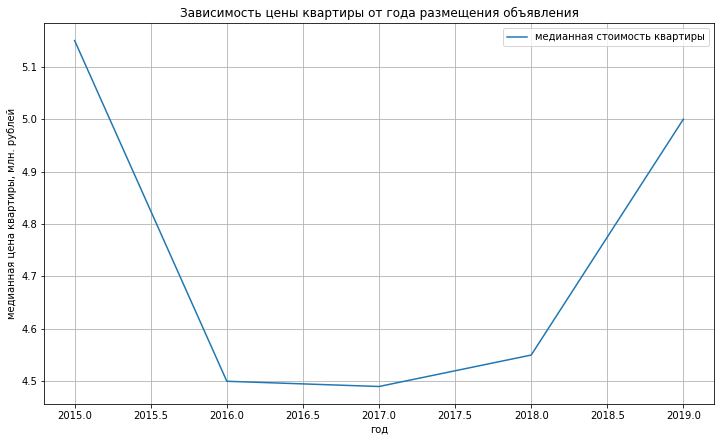

In [89]:
data_year[1:].plot(x='год', y='медианная стоимость квартиры', grid=True, figsize=(12,7));

plt.title('Зависимость цены квартиры от года размещения объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

**Вывод:** медианная цена квартиры <u>зависит от года размещения объявления</u>.\
В 2015-2016 г. цена показывает спад, в 2016-2017 г. почти не меняется, а в 2017-2019 г. средняя цена показывает рост, при этом темпы роста в 2018-2019 г. гораздо выше, чем в 2017-2018 г.

### Зависимость цены от месяца размещения

Свожу таблицу по месяцу размещения объявления и считаю медианную цену.

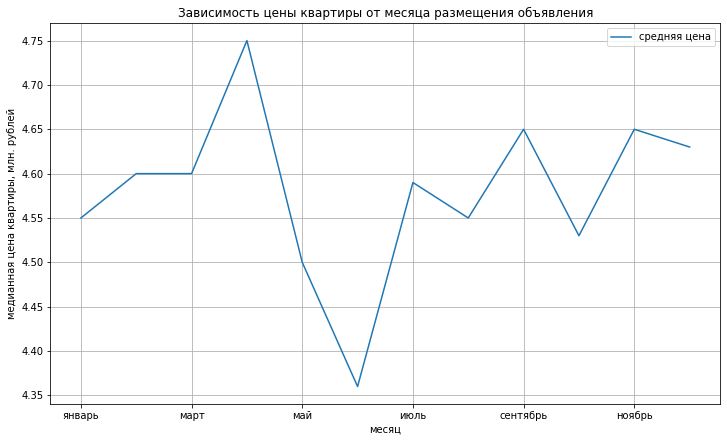

In [90]:
data_months = data_filtered. \
pivot_table(index='month', values='last_price', aggfunc='median'). \
round(2).reset_index()
data_months.columns = ['месяц', 'средняя цена']

data_months['месяц'] = [
    'январь','февраль','март','апрель','май','июнь','июль','август','сентябрь','октябрь','ноябрь','декабрь']

data_months.plot(x='месяц', y='средняя цена', grid=True, figsize=(12,7));
plt.title('Зависимость цены квартиры от месяца размещения объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

**Вывод:** средняя цена квартиры <u>связана с месяцем размешения.</u>\
Наибольшего значения цена достигает в апреле, а наименьшего - в июне.\
Заметны 2 пика роста цен в году - один начинается в феврале, достигает максимума в апреле и падает к маю.\
Второй пик начинается в июне и достигает максимума к сентябрю, почти не меняясь к концу года и незначительно просаживаясь в октябре.

### Зависимость цены от дня размещения

Свожу таблицу по дню недели публикации объявления и считаю медианную стоимость.

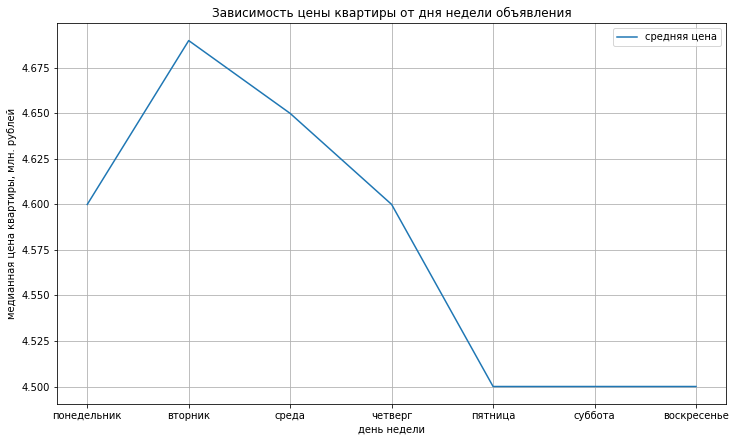

In [91]:
data_days = data_filtered. \
pivot_table(index='week_day', values='last_price', aggfunc='median'). \
round(2).reset_index()
data_days.columns = ['день недели', 'средняя цена']

data_days['день недели'] = [
    'понедельник','вторник','среда','четверг','пятница','суббота','воскресенье']

data_days.plot(x='день недели', y='средняя цена', grid=True, figsize=(12, 7));
plt.title('Зависимость цены квартиры от дня недели объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

**Вывод:** средняя цена квартиры <u>связана с днём недели размещения</u>.\
Заметно, что средняя цена незначительно растёт с понедельника, достигая пика  во вторник, а затем затем резко падает со вторника и достигает минимального значения в пятницу. Минимальная цена сохраняется в субботу и в воскресенье.



## Средняя цена квадратного метра в разных городах. Топ-10 по количеству объявлений

Посчитаем среднюю цену одного квардратного метра в **10** населённых пунктах с <u>наибольшим</u> числом объявлений.
Для этого данные сведены в таблицу по населённому пункту. После этого посчитана средняя цена, а данные отстортированы по количеству объявлений в порядке убывания.


In [92]:
median_meter = {'meter_count':'median', 'total_area':'count'}

locality_count = data_filtered.groupby('locality_name').agg(median_meter). \
reset_index().sort_values('total_area', ascending=False)

locality_count['meter_count'] = locality_count['meter_count'].astype('int')
locality_count['dole'] = (locality_count['total_area']/
                          data_filtered['total_area'].count()).round(3)

locality_count.columns = [
    'Населённый пункт', 'медианная цена м², рублей', 
    'количество объявлений', 'доля объявлений от общего кол-ва']

locality_count.set_index('Населённый пункт').head(10)

,"медианная цена м², рублей",количество объявлений,доля объявлений от общего кол-ва
Населённый пункт,,,
санкт-петербург,104081,15055,0.665
поселок мурино,86042,551,0.024
поселок шушары,76876,438,0.019
всеволожск,65789,397,0.018
пушкин,99744,359,0.016
колпино,74689,332,0.015
поселок парголово,91780,326,0.014
гатчина,67796,307,0.014
деревня кудрово,91860,299,0.013


Также выведем населённые пункты с самой высокой и самой низкой стоимостью м²:

In [93]:
locality_count[locality_count['медианная цена м², рублей'] == locality_count['медианная цена м², рублей'].max()]

,Населённый пункт,"медианная цена м², рублей",количество объявлений,доля объявлений от общего кол-ва
123,кронштадт,111470,1,0.0


In [94]:
locality_count[locality_count['медианная цена м², рублей'] == locality_count['медианная цена м², рублей'].min()]

,Населённый пункт,"медианная цена м², рублей",количество объявлений,доля объявлений от общего кол-ва
90,деревня старополье,11000,3,0.0


**Вывод:** <u>больше всего</u> объявлений размещено по городу **Санкт-Петербург**, при этом его доля от общего количества объявлений составляет **66%**, в то время как доля **всех остальных городов**(в отдельности) с <u>наибольшим</u> количеством объявлений не превышает **2,2%**.\
При этом <u>самая высокая цена</u> м² - у города **Кронштадт**, там стоимость составляет в среднем **111 470 рублей/м²**.\
<u>Самая низкая цена</u> за м² - у **деревни Старополье**, цена составляет в среднем **11 000 рублей/м²**.

## Зависимость цены квартиры в Санкт-Петербурге от расстояния до центра города. Анализ для каждого километра

Построена сводная таблица по **каждому километру** расстояния до центра, и посчитана средняя цена для каждой категории.\
По горизонтали указано расстояние в км, а по вертикали - средняя цена квартир.

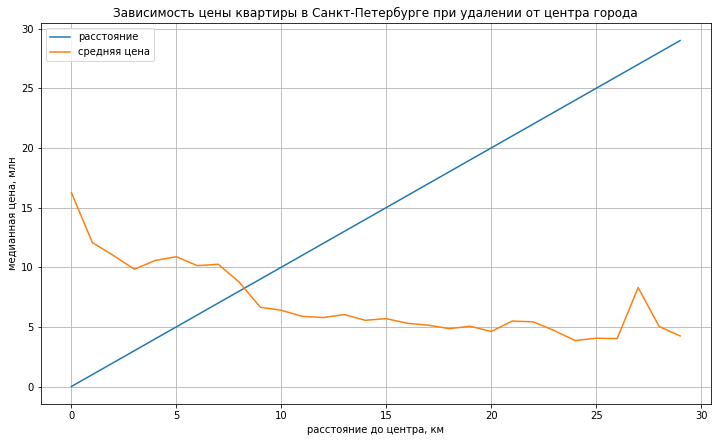

In [95]:
data_spb = data_filtered.query('locality_name == "санкт-петербург"')[['last_price', 'city_centers']] \
.pivot_table(index='city_centers', values='last_price', aggfunc='mean').round(2).reset_index()
data_spb.columns = ['расстояние', 'средняя цена']

data_spb.plot(
    grid=True, title = 'Зависимость цены квартиры в Санкт-Петербурге при удалении от центра города', figsize=(12, 7)
);

plt.xlabel('расстояние до центра, км');
plt.ylabel('медианная цена, млн');

На графике видна зависимость средней цены от расстояния до центра города - <u>она уменьшается с каждым километром</u>.\
При этом заметны нелогичные перепады средней цены:

In [96]:
data_spb.query('расстояние > 25')

,расстояние,средняя цена
26,26.0,4.01
27,27.0,8.30
28,28.0,5.03
29,29.0,4.24


In [97]:
data_spb.query('расстояние < 6')

,расстояние,средняя цена
0,0.0,16.26
1,1.0,12.06
2,2.0,10.99
3,3.0,9.83
4,4.0,10.57
5,5.0,10.88


Из общей карты выбивается средняя цена квартир на расстоянии **27 км** да центра - она <u>сильно выше</u> соседних позиций.\
Также выбивается средняя цена квартир на расстоянии **от 3 до 4 км** до центра - она <u>заметно ниже</u> соседний позиций.\
Такие выбросы могут быть обусловлены какими-либо объявлениями, которые размещены по стоимости ниже или выше средней рыночной, это возможно, поэтому при изучении графика эти выбросы можно не учитывать.

**Вывод:** средняя цена квартиры в Санкт-Петербурге <u>зависит от расстояния до центра города и увеличивается с каждым километром.</u>\
При этом темпы падения цены заметно уменьшаются каждые 5 км.\
Это означает, что в промежутке от **0 до 5 км** цена с каждым километром удаления от центра падает сильнее, чем с каждым километров в промежутке от **5 до 10** км, и так далее.\
При этом после **16 км** удаления от центра падение средней цены квартиры с каждым километром практически останавливается, снова возобновляясь только **после 23 км**.

# Общий вывод

## Факторы, влиящие на цену квартиры больше всего

На стоимость квартиры в Ленинградской области влияет большое количество факторов. Значительнее всего влияют:

### Общая площадь квартиры, а также площадь кухни и жилая площадь в отдельности

Прямая зависимость цены от **общей площади** видна для квартир, площадь которых **меньше 100 метров**, а цена не превышает **10 млн** - после этого зависимость <u>гораздо слабее</u>.\
Можно предположить, что при площади более 100 метров стоимость начинает больше зависеть от других факторов, которые менее важны покупателям,выбирающим квартиры меньше 100 метров. Например, от количество комнат, этажа или количества парков поблизости.

В меньшей степени цена связана с **жилой площадью** и **площадью кухни** .\
Для этих двух факторов она *(степень корреляции)* примерно одинакова.\
При этом корреляция с жилой площадью <u>больше</u>, чем с площадью кухни - это означает, что люди при оценке квартиры больше опираются на жилую площадь, чем на площадь кухни.

### Количество комнат

<AxesSubplot:xlabel='количество комнат'>

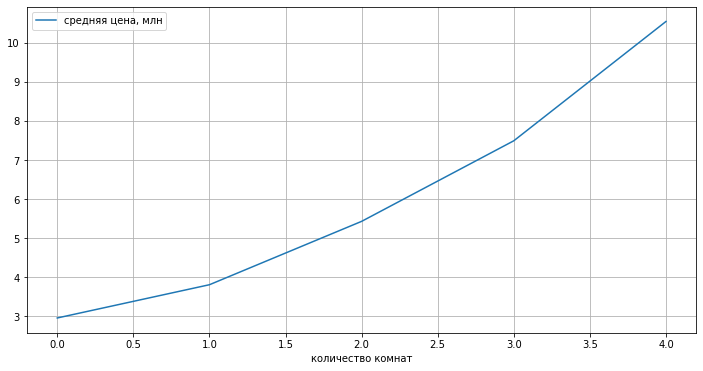

In [98]:
data_rooms.head(5).plot(x='количество комнат', y='средняя цена, млн', grid=True, figsize=(12, 6))

Средняя стоимость квартиры зависит от количества комнат.\
Зависимость обусловнена, в том числе, тем, что большее количество комнат в квартире ведёт к большей общей площади, от которой цена зависит напрямую.\
При этом стоимость растёт геометрически в данной выборке:\
Рост цены при увеличении количества комнат с **3 до 4** комнат больше, чем рост цены от **1 до 3** комнат.

### Тип этажа (первый/последний/другой)

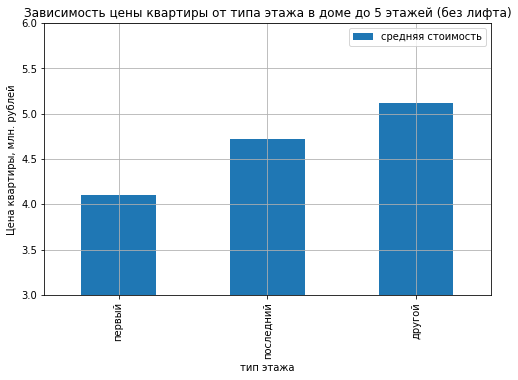

In [99]:
data_low.sort_values('средняя стоимость').plot(
x='тип этажа', y='средняя стоимость', kind='bar', ylim=(3, 6), grid=True, figsize=(8, 5)
);
plt.title('Зависимость цены квартиры от типа этажа в доме до 5 этажей (без лифта)');
plt.ylabel('Цена квартиры, млн. рублей');

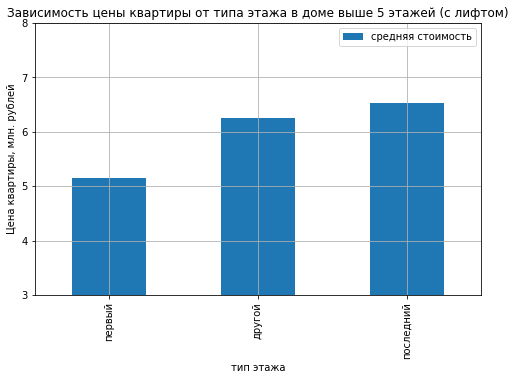

In [100]:
data_high.sort_values('средняя стоимость').plot(
     x='тип этажа', y='средняя стоимость', kind='bar', ylim=(3, 8), grid=True, figsize=(8, 5)
);
plt.title('Зависимость цены квартиры от типа этажа в доме выше 5 этажей (с лифтом)');
plt.ylabel('Цена квартиры, млн. рублей');

Меньше всего стоят квартиры на первом этаже.\
При этом:\
В домах <u>без лифта</u> (5 этажей и меньше) последний этаж ценится **меньше**, чем остальные этажи (кроме первого)\
В домах <u>с лифтом</u> (больше 5 этажей) последний этаж ценится **больше**, чем все остальные.

Это может быть связано с тем, что в домах <u>без лифта</u>. нужно постоянно подниматься на последний этаж пешком.\
В домах на **6 и более этажей** <u>лифт присутствует</u>, при этом в высоких домах люди могут отдавать предпочтения последнему этажу ради вида из окна.

### Год размещения

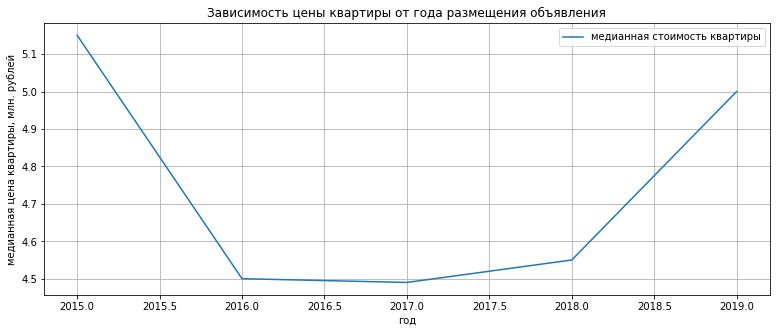

In [101]:
data_year[1:].plot(x='год', y='медианная стоимость квартиры', grid=True, figsize=(13, 5));

plt.title('Зависимость цены квартиры от года размещения объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

Цена квартиры <u>зависит от года размещения объявления</u>.\
В 2015-2016 г. цена показывает спад, в 2016-2017 г. почти не меняется, а в 2017-2019 г. средняя цена показывает рост, при этом темпы роста в 2018-2019 г. гораздо выше, чем в 2017-2018 г.

### Месяц размещения

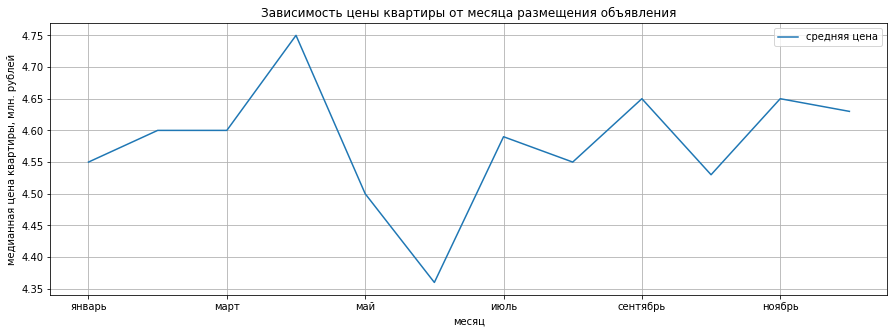

In [102]:
data_months.plot(x='месяц', y='средняя цена', grid=True, figsize=(15, 5));
plt.title('Зависимость цены квартиры от месяца размещения объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

Средняя цена квартиры <u>связана с месяцем размешения.</u>\
Наибольшего значения цена достигает в апреле, а наименьшего - в июне.\
Есть 2 волны роста цен в году:
* Первая начинается в феврале, достигает максимума в апреле и падает к маю ниже февральского значения.
* Вторая волна начинается в июне и достигает максимума к сентябрю, почти не меняясь до конца года и незначительно просаживаясь в октябре.\.

### День недели размещения

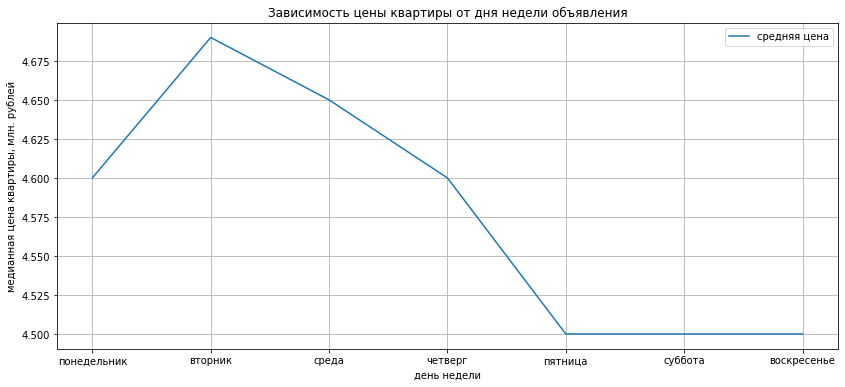

In [103]:
data_days.plot(x='день недели', y='средняя цена', grid=True, figsize=(14, 6));
plt.title('Зависимость цены квартиры от дня недели объявления');
plt.ylabel('медианная цена квартиры, млн. рублей');

Средняя цена квартиры <u>связана с днём недели размещения</u>.\
Заметно, что средняя цена незначительно растёт с понедельника, достигая пика  в четверг, затем резко падает с четверга по субботу до минимального значениия, немного восстанавливаясь к воскресенье.

### Расстояние до центра города в километрах. Санкт-Петербург

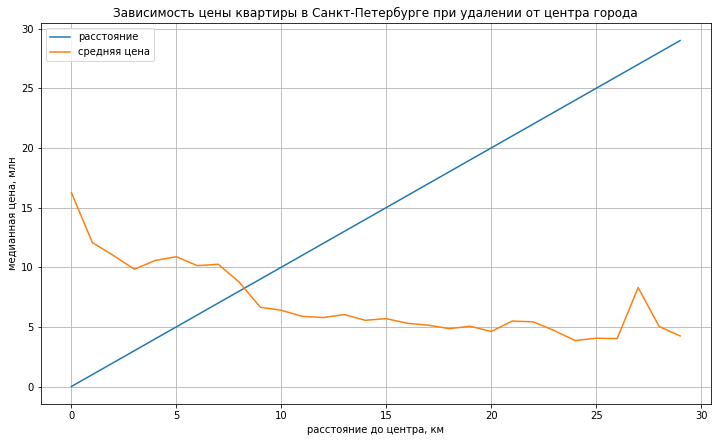

In [104]:
data_spb.plot(
    grid=True, title = 'Зависимость цены квартиры в Санкт-Петербурге при удалении от центра города', figsize=(12, 7)
);

plt.xlabel('расстояние до центра, км');
plt.ylabel('медианная цена, млн');

средняя цена квартиры в Санкт-Петербурге уменьшается с каждым километром удаления от центра города.</u>\
При этом темпы падения цены заметно уменьшаются каждые 5 км.\
Это означает, что в промежутке от **0 до 5 км** цена с каждым километром удаления от центра падает сильнее, чем с каждым километров в промежутке от **5 до 10** км, и так далее.\
При этом после **16 км** удаления от центра падение средней цены квартиры с каждым километром практически останавливается, снова возобновляясь только **после 23 км**.

### Как быстро продаются квартиры?

<u>Большинство объявлений</u> в среднем находят покупателя в срок от **22 до 199 дней**.\
При этом <u>в среднем</u> объявление проводит на площадке **155 дней**.\
<u>необычно высокие</u> значения начинаются после границы в **450 дней**. \
Таким образом, можно считать продажи по объявлениям, <u>которые нашли покупателей менее, чем за **22** дня, **быстрыми**</u>, а продажи квартир, <u>длящиеся более **450 дней** - необычно долгими</u>.

### Города-лидеры по количеству объявлений, максимальная и минимальная средняя цена за квадратный метр

Больше всего объявлений размещено по городу **Санкт-Петербург**, при этом его доля от общего количества объявлений составляет **66%**, в то время как доля **всех остальных городов***(в отдельности)* с <u>наибольшим</u> количеством объявлений не превышает **2,2%**.

При этом <u>самая высокая цена</u> м² - у города **Кронштадт**, там стоимость составляет в среднем **111 470 рублей/м²**.\
<u>Самая низкая цена</u> за м² - у **деревни Старополье**, цена составляет в среднем **11 000 рублей/м²**.

In [105]:
locality_count.set_index('Населённый пункт').head(10)

,"медианная цена м², рублей",количество объявлений,доля объявлений от общего кол-ва
Населённый пункт,,,
санкт-петербург,104081,15055,0.665
поселок мурино,86042,551,0.024
поселок шушары,76876,438,0.019
всеволожск,65789,397,0.018
пушкин,99744,359,0.016
колпино,74689,332,0.015
поселок парголово,91780,326,0.014
гатчина,67796,307,0.014
деревня кудрово,91860,299,0.013


## Рекомендации

Во время предобработки данных выявлены проблемы с некоторыми из них.

В эти колонках встречаются пропуски:
* ceiling_height
* floors_total
* living_area
* is_apartment
* kitchen_area
* balcony
* locality_name
* airports_nearest
* cityCenters_nearest
* parks_around3000
* parks_nearest
* ponds_around3000
* ponds_nearest
* days_exposition

Из этих колонок можно выделить те, которые заполняет пользователь при публикации объявления:

* высота потолков
* этажей в доме
* жилая площадь
* площадь кухни
* апартаменты или нет
* количество балконов

Эти пропуски можно объяснить человеческим фактором - люди просто не заполнили эти поля.\
Количество пропусков в графе "апартаменты или нет" очень большое, возможно, это можно решить путём небольшой сноски для пользователя при создании объявления. В сноске будет краткая информация о квартирах, которые являются апартаментами.

Таким образом, причина - человеческий фактор.

Колонки с пропусками, которые не зависят от автора объявления и выгружаются системой:

* название города
* расстояние до ближайшего аэропорта
* расстояние до центра города
* парков в радиусе 3км
* расстояние до ближайшего парка
* водоёмов в радиусе 3км
* расстояние до ближайшего водоёма
* количество дней размещения

Причиной этих пропусков может быть технический фактор. В данных о расстоянии до центра города также встречается много аномальных значений, что говорит о том, что система неверно оценивает принадлежность к какому-либо городу (либо пользователь неверно указывает адрес).\
Также причиной пропусков может быть отсутствие парков и водоёмов поблизости.